# Real Estate Monte Carlo Simulation

The purpose of this exercize is to help determine the best investment strategy for my personal finances over a given horizon. I considered two sources of returns: investing in montreal real-estate and investing in the stock market. 

I'm using monte carlo for this analysis because given the return history of the stock market and the real-estate market there is some uncertainty in projecting the forecasted results of these two investment vehicles. To account for this uncertainty the monte carlo method assumes a normal return distribution for the stock market and the montreal real-estate market and pulls returns from these distributions at random. Simulating the overall return on investment of these two vehicles 1000 times returns the ROI distribution of the given investment strategy.

The constraints of my investment strategy is that I have some yearly gross salary. I assume that a given percent of this gross salary can be spent on my living situation and investments. For example, if I decide to continue to rent my apartment and put all my money into the stock market that % of my gross yearly salary under consideration would be :

$$Yearly Investment = Cost of Rent + Stock Market Investment$$

If I decide to purchase a condo the yearly investment would be:

$$Yearly Investment = Yearly Mortgage Payment + Yearly Condo Fees + Property and School Taxes + Stock Market Investment$$

The main differentiators are that in the latter strategy I have no cost associated with rent because I would be living in my purhcased condo, also since I have taken on a more expensive cost structure for my real-estate investment I have considerably less money to invest in the stock market

### Assumptions:
- the S&P 500 is a proxy for stock market returns and future returns on the S&P 500 follow the same distribution as the returns from 1970-2018
- The composite HPI for montreal is a proxy for expected returns from real-estate capital gains
- Rent & salary increase of 3% annually
- An existing investment in the stock market of 20,000 dollars (irrespective of the investment strategy taken)
- 10-year fixed term mortgage with a 2.8% interest rate
- Propery taxes are 1% of the market value of the condo & school taxes are 0.15%
- 20% up-front downpayment required for any real-estate investment (to avoid penalties)
- Real-estate broker fee of 5% of market value at the end of the investment horizon (assuming the property will be sold at that point)
- Startup cost of purchasing a condo of $6000 to account for inspection & administrative fees
- 100 dollars annual transaction fees for purchasing stocks
- 30Y investment horizon for all simulations

# Simulation:

### Import Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt

# Custom library found at ./montecarlo.py
from montecarlo import create_sp_return_generator, create_housing_return_generator, last_entry, REAsset, StockAsset, one_sim

%matplotlib inline

For the sake of the simulations - assume a gross salary of 65,000 dollars investing 45% of it into the various strategies with a 30-year horizon and 20,000 dollars initial investment

In [2]:
gross_salary = 65_000
investment_rate = 0.45
existing_investment = 20_000

### Testing: Amortization Period

Assume you're looking to buy a condo at $400,000 at a 20-year, 25-year, and 30-year amortization period

Simulate each investment strategy 1000 times:

In [3]:
data = []
for epoch in range(1, 1000):
    _, ROI_20Y = one_sim(400_000, 100_000, 20, gross_salary, investment_rate, 30, existing_investment, verbose=0)
    _, ROI_25Y = one_sim(400_000, 100_000, 25, gross_salary, investment_rate, 30, existing_investment, verbose=0)
    _, ROI_30Y = one_sim(400_000, 100_000, 30, gross_salary, investment_rate, 30, existing_investment, verbose=0)
    data.append({'Epoch': epoch, '20Y Amortization': ROI_20Y, '25Y Amortization': ROI_25Y, '30Y Amortization': ROI_30Y})
results = pd.DataFrame(data)

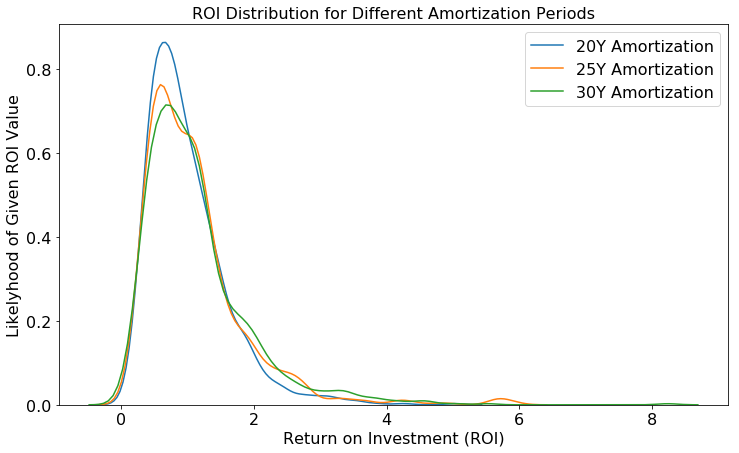

In [4]:
plt.figure(figsize=(12, 7))
ax = sns.kdeplot(results['20Y Amortization'])
ax = sns.kdeplot(results['25Y Amortization'])
ax = sns.kdeplot(results['30Y Amortization'])
ax.set_title('ROI Distribution for Different Amortization Periods', fontsize=16);
ax.set_xlabel('Return on Investment (ROI)', fontsize=16);
ax.set_ylabel('Likelyhood of Given ROI Value', fontsize=16);
ax.tick_params(axis='both', which='major', labelsize=16);
ax.legend(fontsize = 16);

From the results above it seems rather clear that a longer amortization period is more benefitial for overall ROI. There is a small downside risk by increasing the amortization period but it is met with even more chance of potential gains on the right-hand tail of the ROI distribution. Clearly this indicates that the longer amortization period is riskier however much of that risk is on the upside region of the distribution.

Thinking intuitively this makes sense - interest rates are relatively low & the expected return on the S&P is considerably higher (albeit with more risk). A longer amortization period means lower monthly payments which allows for a larger investment into the stock market (this is the added risk associated with a longer amortization period).

My preliminary conclusion is the maximize the amortization period of any real-estate investment with the assumption of a 10Y fixed mortgage giving a rate of around 2.8%

### Testing: Not Buying (Renting)

Assume you want to either buy a condo worth $400,000 or rent and put all potential investment dollars into the stock market

Simulate each investment strategy 1000 times:

In [5]:
data = []
for epoch in range(1, 1000):
    _, ROI_30Y = one_sim(400_000, 100_000, 30, gross_salary, investment_rate, 30, existing_investment, verbose=0)
    _, ROI_Rent = one_sim(0, 100_000, 30, gross_salary, investment_rate, 30, existing_investment, verbose=0)
    data.append({'Epoch': epoch, '30Y Amortization': ROI_30Y, 'Renting': ROI_Rent})
results = pd.DataFrame(data)

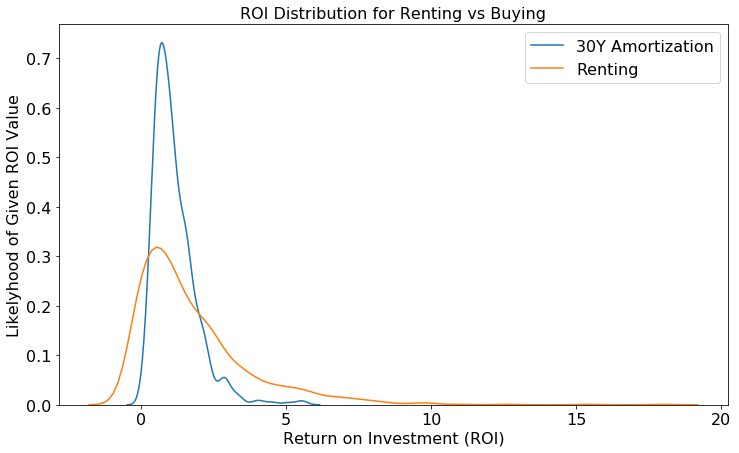

In [6]:
plt.figure(figsize=(12, 7))
ax = sns.kdeplot(results['30Y Amortization'])
ax = sns.kdeplot(results['Renting'])
ax.set_title('ROI Distribution for Renting vs Buying', fontsize=16);
ax.set_xlabel('Return on Investment (ROI)', fontsize=16);
ax.set_ylabel('Likelyhood of Given ROI Value', fontsize=16);
ax.tick_params(axis='both', which='major', labelsize=16);
ax.legend(fontsize = 16);

As anticipated - renting and putting all investment in the stock market is a riskier profile (wider distribution). This time however the majority of the risk is on the downside of the distribution when comparing the renting investment strategy to the 30Y mortgage. It seems that the risk associated with putting all that money into the stock market might not be worth the potential downside. 

Additional factors influencing the different distributions is the cost structure of renting vs buying is different. When you're renting you're losing money to rent payments, while when you buy you lose money to taxes and condo fees. 

My preliminary conclusion is that renting & investing all funds into the stock market poses too much downside risk to view as a viable alternative to buying. A limitation of this simulation is the assumption that you would put all money on the S&P: a savvy investor would likely diversify their portfolio & include financial instruments with lower risk than the S&P. For the sake of this analysis however - buying seems to be the smarter strategy.

### Testing: Cost of Condo

From the analysis above it seems fair to say that a 30Y amortization period is the way to go. Now we will simulate the effectiveness of purchasing different condos at different price points (400k, 450k, 500k)

In [7]:
data = []
for epoch in range(1, 1000):
    _, ROI_300K = one_sim(400_000, 100_000, 30, gross_salary, investment_rate, 30, existing_investment, verbose=0)
    _, ROI_350K = one_sim(450_000, 100_000, 30, gross_salary, investment_rate, 30, existing_investment, verbose=0)
    _, ROI_400K = one_sim(500_000, 100_000, 30, gross_salary, investment_rate, 30, existing_investment, verbose=0)
    data.append({'Epoch': epoch, '400K Condo': ROI_300K, '450K Condo': ROI_350K, '500K Condo': ROI_400K})
results = pd.DataFrame(data)

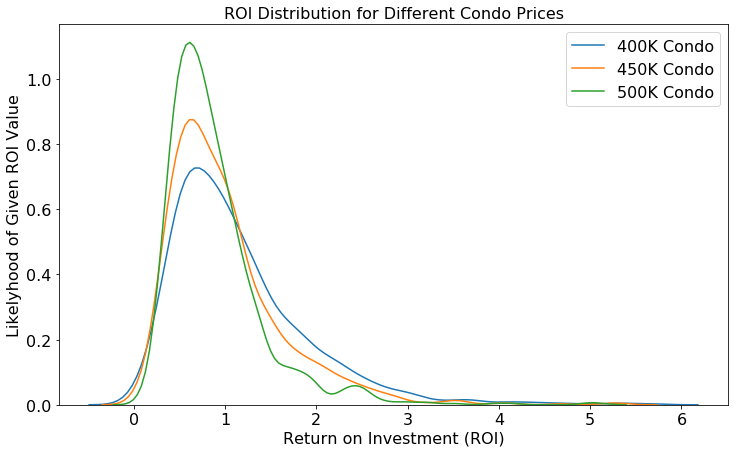

In [8]:
plt.figure(figsize=(12, 7))
ax = sns.kdeplot(results['400K Condo'])
ax = sns.kdeplot(results['450K Condo'])
ax = sns.kdeplot(results['500K Condo'])
ax.set_title('ROI Distribution for Different Condo Prices', fontsize=16);
ax.set_xlabel('Return on Investment (ROI)', fontsize=16);
ax.set_ylabel('Likelyhood of Given ROI Value', fontsize=16);
ax.tick_params(axis='both', which='major', labelsize=16);
ax.legend(fontsize = 16);

From the results of this simulation it seems clear that the cheaper the value of the real-estate purchase the more probable that you will have a larger ROI given you allocate the unspent dollars to investment in the S&P. There is a negligable difference in the downside risk of the three distributions while the upside risk favors the 400K condo purchase over the 500K purchase quite significantly. This is an indication that if you overspend on your real-estate purchase you can miss out on potential returns from the stock-market & limit your upside potential.

# Conclusion

From the three test cases outlined in this report I would reccomend the following:

1) If you can afford the downpayment and startup costs - puchasing real-estate is a good investment in Montreal if the assumed alternative is to put all your savings into the stock market

2) Select the largest amortization period you can while the interest rate of a 10Y fixed mortgage is hovering around 2.8%

3) Don't overspend on your real-estate purchase - if you don't allow yourself to put some of your yearly savings into the stock market you miss out on the potential upside of stock returns.